<a href="https://colab.research.google.com/github/AlienX77-cmd/Machine-Learning-Practice-Project/blob/main/ML_Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

##*Using Loan.csv file*

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Loan.csv to Loan.csv


##**Data Collection and Processing**

In [4]:
# Loading the loan dataset to pandas dataframe
loan = pd.read_csv('/content/Loan.csv')

In [5]:
type(loan)

pandas.core.frame.DataFrame

In [7]:
# Showing first 5 rows of dataframe
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# Showing number of rows (data points) and columns (features)
loan.shape

(614, 13)

In [9]:
# Showing Statistical information of the dataset
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
# Checking for missing values in each feacture
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Dropping the missing values
loan = loan.dropna()

In [12]:
# Label encoding
loan.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)

In [13]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [15]:
# Dependent column values
loan['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [16]:
# Replacing the value of 3+ to 4
loan = loan.replace(to_replace='3+', value=4)

In [17]:
loan['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

##**Data Visualization**

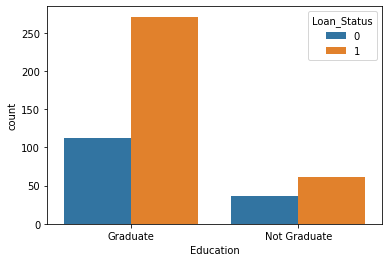

In [19]:
# Education vs Loan Status
sns.countplot(x="Education", hue='Loan_Status', data=loan)

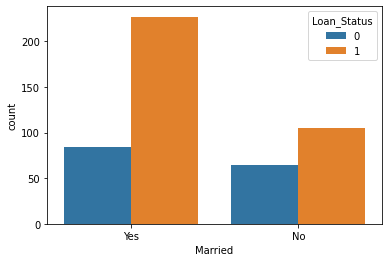

In [20]:
# Marital Status vs Loan Status
sns.countplot(x="Married", hue="Loan_Status", data=loan)

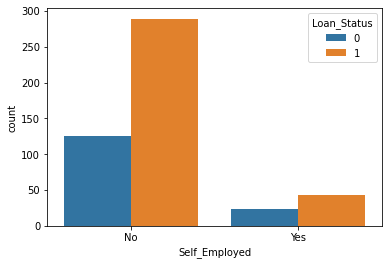

In [21]:
# Self_Employed vs Loan Status
sns.countplot(x="Self_Employed", hue="Loan_Status", data=loan)

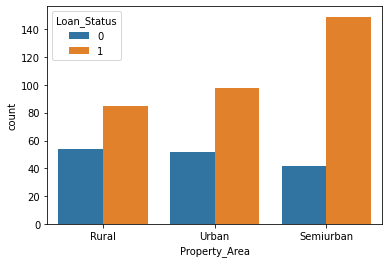

In [22]:
# Property_Area vs Loan Status
sns.countplot(x="Property_Area", hue="Loan_Status", data=loan)

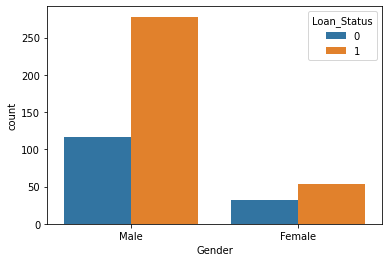

In [23]:
# Gender vs Loan Status
sns.countplot(x="Gender", hue="Loan_Status", data=loan)

In [24]:
# Converting categorical columns to numerical values
loan.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [25]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1
613,LP002990,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1,0


##**Seperating the data and target**

In [26]:
X = loan.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = loan['Loan_Status']

In [27]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [28]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


###**Train Test Splitting**

In [30]:
loan['Loan_Status'].value_counts()
#Loan_Status data isn't well distributed

1    332
0    148
Name: Loan_Status, dtype: int64

In [29]:
#test_size=0.1 --> 10% of data will be in test data and 90% of data will be in training data, stratify=Y means to make the distribution of data according to target value more well distributed into training and testing data
X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


##**Training the Support Vector Machine Model**

In [32]:
classifier = svm.SVC(kernel='linear')

In [33]:
# Training the SVC model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

##**Model Evaluation**

In [35]:
# Accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)
print('Accuracy on training data (in percent): ', round(training_data_accuracy*100, 2))

Accuracy on training data :  0.7986111111111112
Accuracy on training data (in percent):  79.86


In [36]:
# Accuracy score on testing data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)
print('Accuracy on test data (in percent): ', round(test_data_accuracy*100, 2))

Accuracy on test data :  0.8333333333333334
Accuracy on test data (in percent):  83.33
